In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = r"F:\project\BreastCancer_data.csv"
df = pd.read_csv(file_path)
df.drop('id', axis=1, inplace=True)

In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df[df.columns[0]]=labelencoder_Y.fit_transform(df.iloc[:,0].values)

In [10]:
df.tail(7)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [11]:
#basic descriptive statistics
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Break up columns into groups 
df_diag = df[['diagnosis']]
df_mean = df.filter(regex='_mean$')
df_se = df.filter(regex='_se$')
df_worst = df.filter(regex='_worst$')

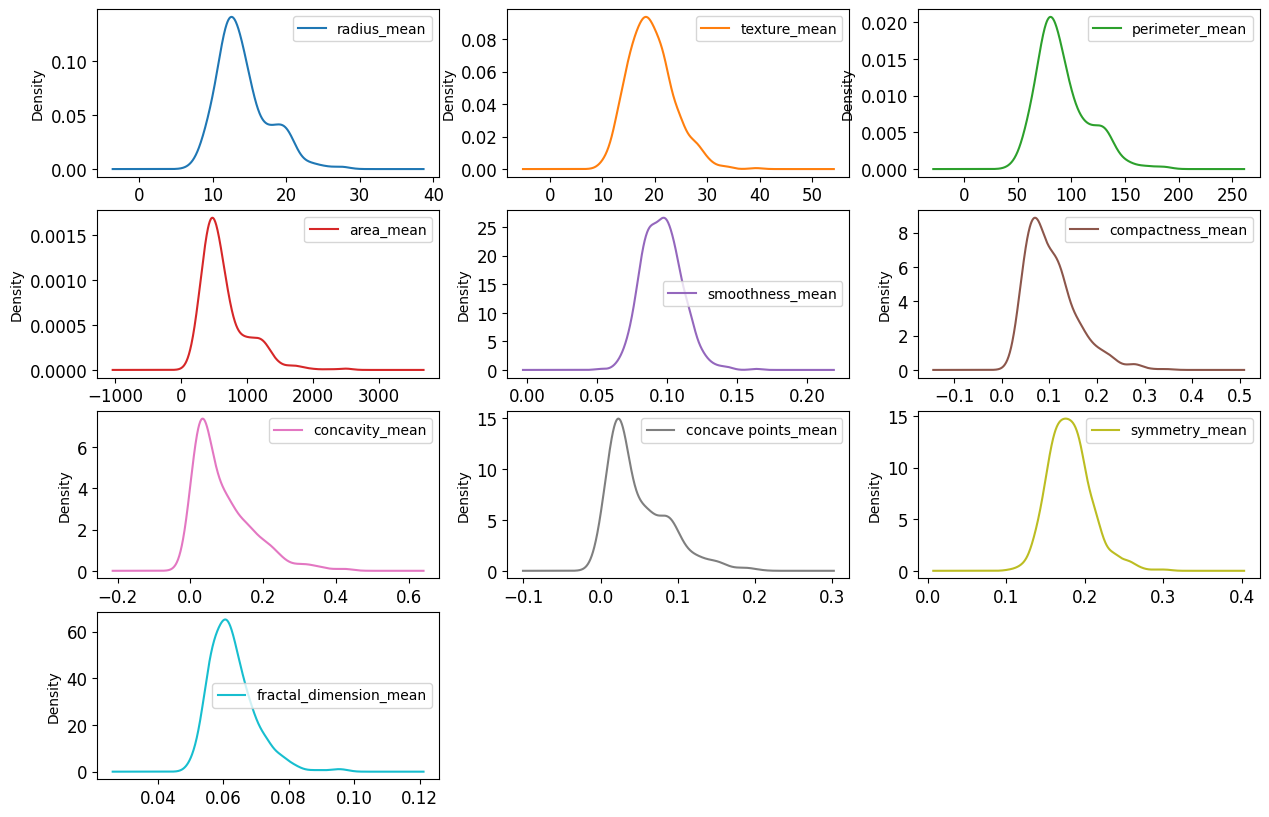

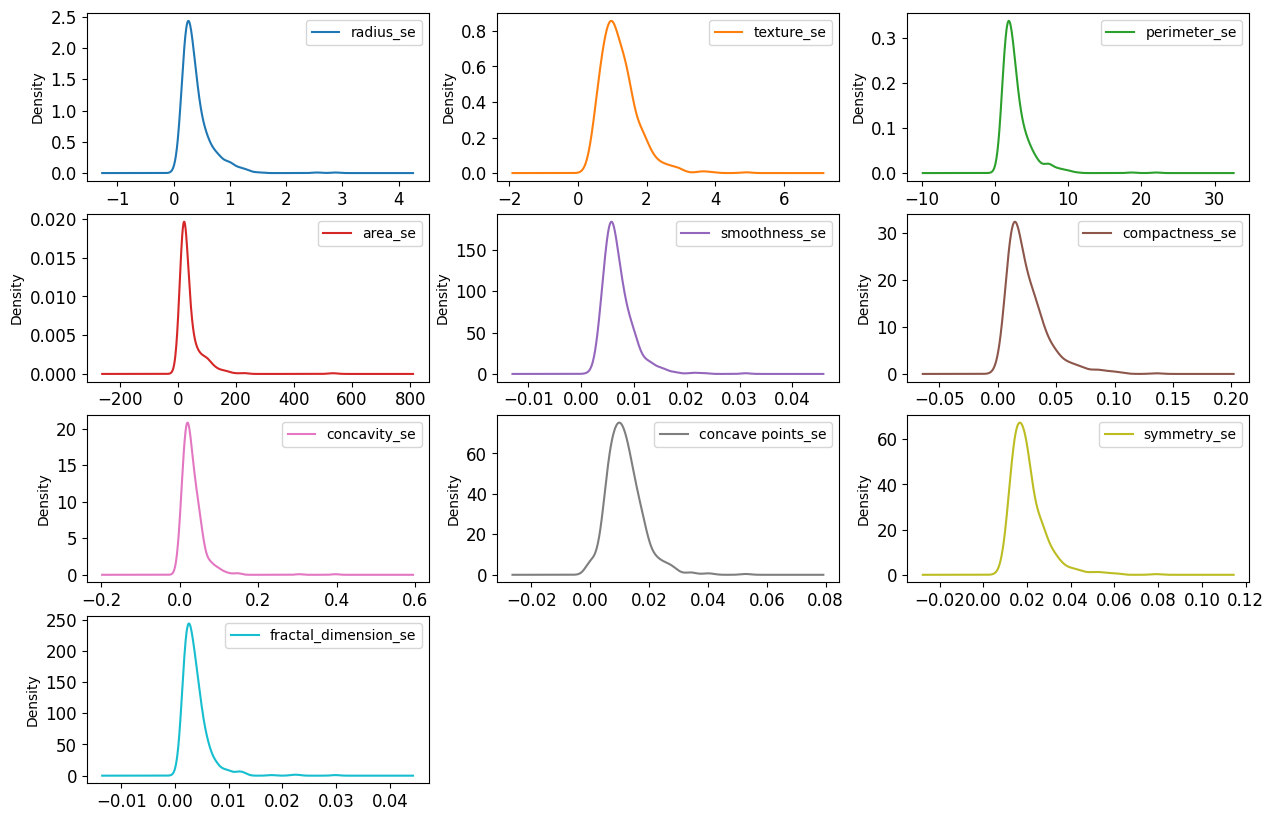

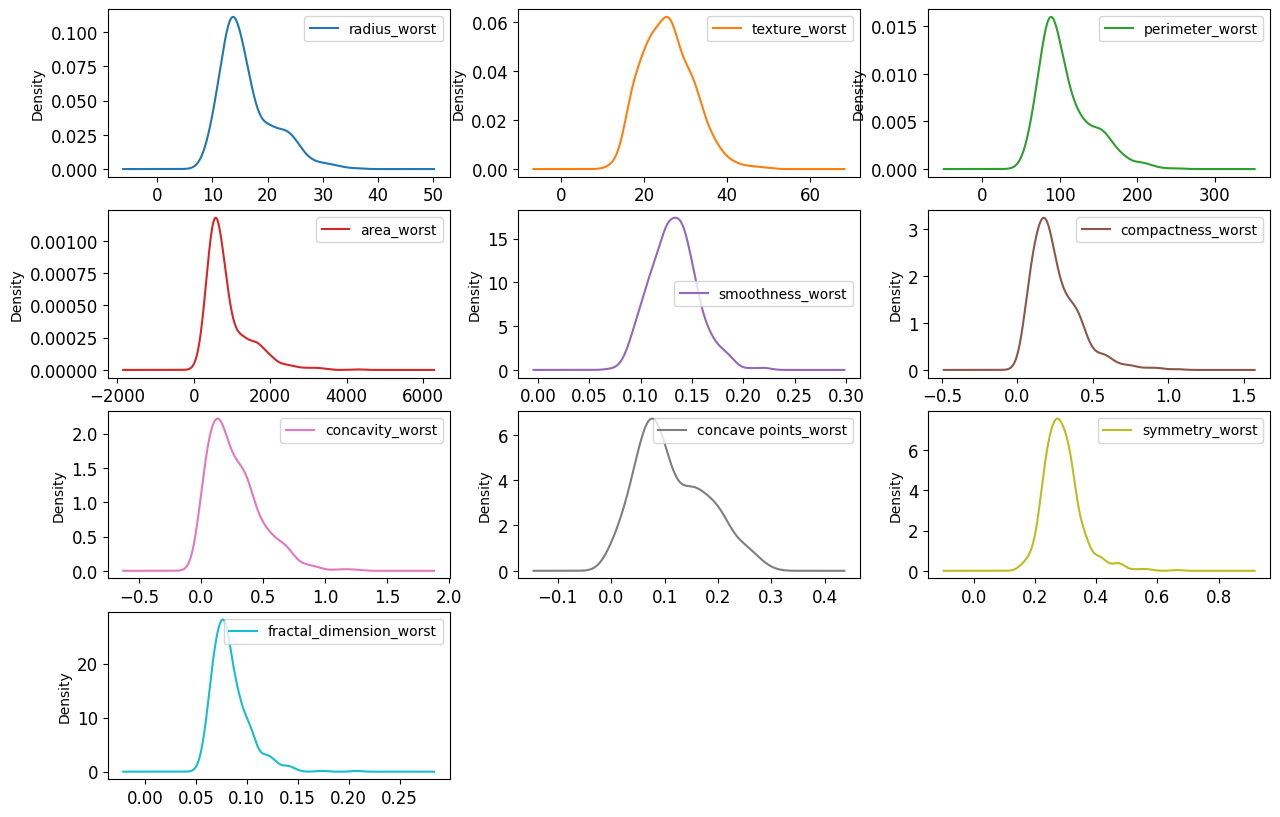

In [13]:
# Density Plots
plt_mean = df_mean.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, sharey=False, fontsize=12, figsize=(15, 10))
plt_se = df_se.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, sharey=False, fontsize=12, figsize=(15, 10))
plt_worst = df_worst.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, sharey=False, fontsize=12, figsize=(15, 10))


In [14]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

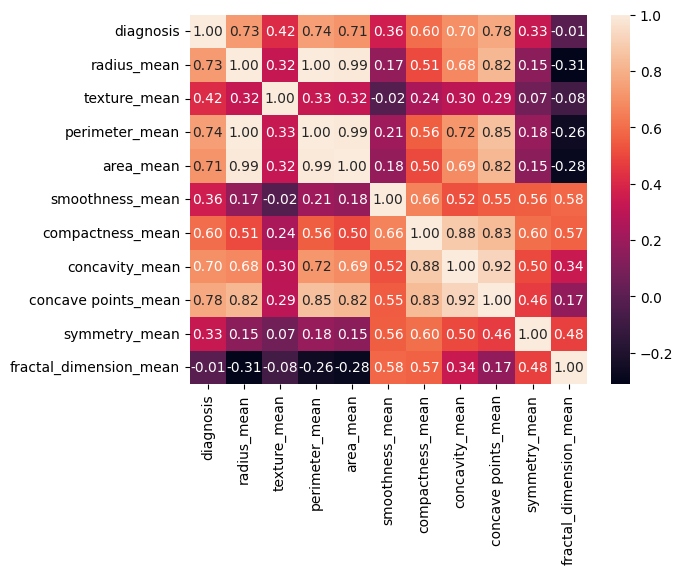

In [15]:

sns.heatmap(df.iloc[:, :11].corr(), annot=True, fmt='.2f')


<Axes: >

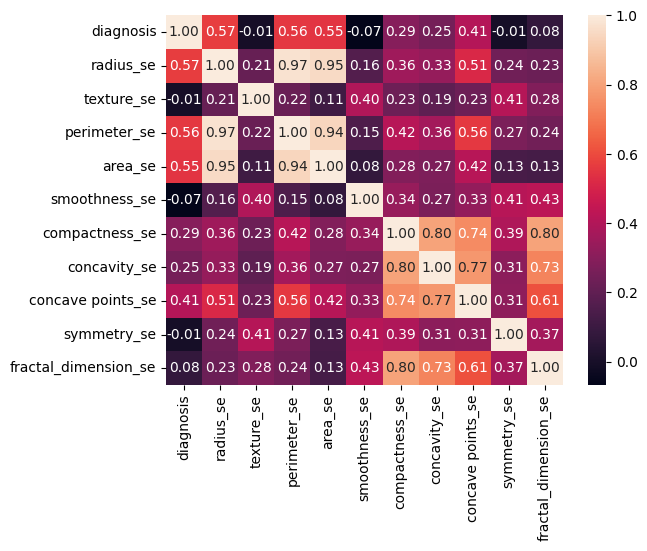

In [16]:
sns.heatmap(df.iloc[:, [0] + list(range(11, 21))].corr(), annot=True, fmt='.2f')

<Axes: >

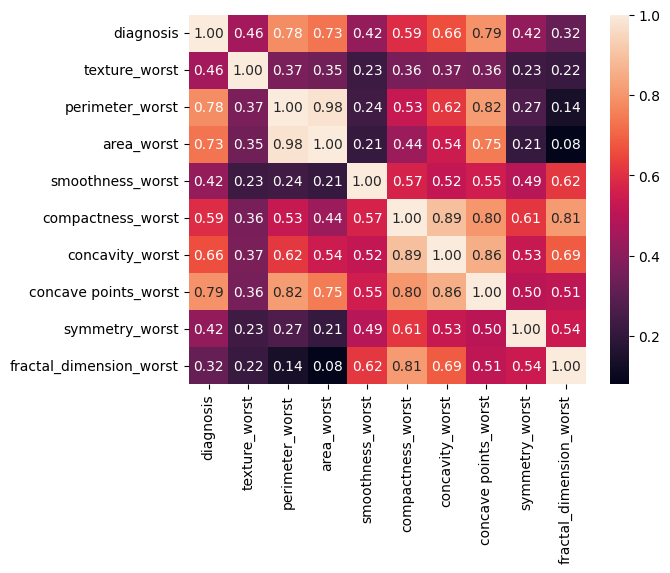

In [17]:
sns.heatmap(df.iloc[:, [0] + list(range(22, 31))].corr(), annot=True, fmt='.2f')

In [18]:
# Split the dataset into independent (X) and dependent (Y) variables
X = df.iloc[:, 1:31].values  # Independent variables (features)
Y = df.iloc[:, 0].values      # Dependent variable (target)

In [19]:
#split the dataset into 75% training and 25% testing    
from sklearn .model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25, random_state=0)

In [24]:
#scale the data    
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

#Train multiple base models
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, Y_train) 

gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=0)
gradient_boosting.fit(X_train, Y_train)

adaboost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaboost.fit(X_train, Y_train)

# Combine predictions
base_models = [random_forest, gradient_boosting, adaboost]
ensemble_predictions = []

for model in base_models:
    ensemble_predictions.append(model.predict(X_test))

# Use voting to combine predictions
voting_predictions = []  

for i in range(len(X_test)):
    # Calculate the mode (most common prediction) for each sample
    mode_prediction = max(set([prediction[i] for prediction in ensemble_predictions]), key=[prediction[i] for prediction in ensemble_predictions].count)
    voting_predictions.append(mode_prediction)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(Y_test, voting_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, voting_predictions))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(Y_test, voting_predictions)
print("ROC-AUC Score:", roc_auc)


f:\project\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ensemble Model Accuracy: 0.972027972027972
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        90
           1       0.93      1.00      0.96        53

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

ROC-AUC Score: 0.9777777777777779


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Initialize SVM classifier 
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the SVM classifier
svm_classifier.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
auc_roc = roc_auc_score(Y_test, y_pred)

print("Original Classifier Performance:")                                   
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("AUC-ROC:", auc_roc)

Original Classifier Performance:
Accuracy: 0.965034965034965
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

Precision: 0.9615384615384616
Recall (Sensitivity): 0.9433962264150944
Specificity: 0.9777777777777777
AUC-ROC: 0.960587002096436


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [1, 5, 10],  # Regularization parameter
    'gamma': ['auto','scale'],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=9, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize SVM classifier with the best hyperparameters
svm_classifier_tuned = SVC(**best_params)

# Train the tuned SVM classifier
svm_classifier_tuned.fit(X_train, Y_train)

# Make predictions on the testing set using the tuned classifier
y_pred_tuned = svm_classifier_tuned.predict(X_test)

# Evaluate the tuned classifier
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
precision_tuned = precision_score(Y_test, y_pred_tuned)
recall_tuned = recall_score(Y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(Y_test, y_pred_tuned)
specificity_tuned = conf_matrix_tuned[0, 0] / (conf_matrix_tuned[0, 0] + conf_matrix_tuned[0, 1])
auc_roc_tuned = roc_auc_score(Y_test, y_pred_tuned)

print("\nTuned Classifier Performance:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall (Sensitivity):", recall_tuned)
print("Specificity:", specificity_tuned)
print("AUC-ROC:", auc_roc_tuned)



Tuned Classifier Performance:
Accuracy: 0.965034965034965
Precision: 0.9615384615384616
Recall (Sensitivity): 0.9433962264150944
Specificity: 0.9777777777777777
AUC-ROC: 0.960587002096436


In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define a new parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Adjusted range for the regularization parameter
    'gamma': [0.1, 1, 10],    # Adjusted range for the kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=9, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize SVM classifier with the best hyperparameters
svm_classifier_tuned = SVC(**best_params)

# Train the tuned SVM classifier
svm_classifier_tuned.fit(X_train, Y_train)

# Make predictions on the testing set using the tuned classifier
y_pred_tuned = svm_classifier_tuned.predict(X_test)

# Evaluate the tuned classifier
accuracy_tuned = accuracy_score(Y_test, y_pred_tuned)
precision_tuned = precision_score(Y_test, y_pred_tuned)
recall_tuned = recall_score(Y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(Y_test, y_pred_tuned)
specificity_tuned = conf_matrix_tuned[0, 0] / (conf_matrix_tuned[0, 0] + conf_matrix_tuned[0, 1])
auc_roc_tuned = roc_auc_score(Y_test, y_pred_tuned)

print("\nTuned Classifier Performance:")
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall (Sensitivity):", recall_tuned)
print("Specificity:", specificity_tuned)
print("AUC-ROC:", auc_roc_tuned)



Tuned Classifier Performance:
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.951048951048951
Precision: 0.9259259259259259
Recall (Sensitivity): 0.9433962264150944
Specificity: 0.9555555555555556
AUC-ROC: 0.949475890985325
